**Table of contents**<a id='toc0_'></a>    
- [创建和生成](#toc1_1_)    
    - [从 python 列表或元组创建](#toc1_1_1_)    
    - [使用 arange 生成](#toc1_1_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## <a id='toc1_1_'></a>[创建和生成](#toc0_)

先学会如何快速拿到一个 array 是有很多益处的。本节我们主要介绍以下几种常用的创建方式：

- 使用列表或元组
- 使用 arange
- 使用 linspace/logspace
- 使用 ones/zeros
- 使用 random
- 从文件读取

其中，最常用的一般是 **linspace/logspace 和 random**，前者常常用在画坐标轴上，后者则用于生成「模拟数据」。举例来说，当我们需要画一个函数的图像时，X 往往使用 linspace 生成，然后使用函数公式求得 Y，再 plot；当我们需要构造一些输入（比如 X）或中间输入（比如 Embedding、hidden state）时，random 会异常方便。

### <a id='toc1_1_1_'></a>[从 python 列表或元组创建](#toc0_)

重点掌握传入 list 创建一个 array 即可：np.array(list)

In [2]:
# 一个 list
np.array([1, 2, 3])

array([1, 2, 3])

In [4]:
# 二维（多维类似）
# 注意，有一个小数哦
np.array([[1,2.,3],[4,5,6]])

array([[1., 2., 3.],
       [4., 5., 6.]])

In [5]:
np.array([1,2,3], dtype=np.float16)

array([1., 2., 3.], dtype=float16)

In [7]:
# 
list = [
    [1, 2, 3],
    [4, 5, 6.8]
]
np.array(list, dtype=np.int32)

array([[1, 2, 3],
       [4, 5, 6]])

In [8]:
# 个 tuple
np.array((1.1, 2.2))

array([1.1, 2.2])

In [9]:
# tuple，一般用 list 就好，不需要使用 tuple
np.array([(1.1, 2.2, 3.3), (4.4, 5.5, 6.6)])

array([[1.1, 2.2, 3.3],
       [4.4, 5.5, 6.6]])

In [10]:
# 转换而不是上面的创建，其实是类似的，无须过于纠结
np.asarray((1,2,3))

array([1, 2, 3])

In [11]:
np.asarray(([1., 2., 3.], (4., 5., 6.)))

array([[1., 2., 3.],
       [4., 5., 6.]])

### <a id='toc1_1_2_'></a>[使用 arange 生成](#toc0_)
**range 是 Python 内置的整数序列生成器，arange 是 numpy 的**，效果类似，会生成一维的向量。我们偶尔会需要使用这种方式来构造 array，比如：

- 需要创建一个连续一维向量作为输入（比如编码位置时可以使用）
- 需要观察筛选、抽样的结果时，有序的 array 一般更加容易观察

In [12]:
np.arange(12).reshape(3, 4)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [13]:
# 注意，是小数哦
np.arange(12.0).reshape(4, 3)

array([[ 0.,  1.,  2.],
       [ 3.,  4.,  5.],
       [ 6.,  7.,  8.],
       [ 9., 10., 11.]])

In [14]:
np.arange(100, 124, 2).reshape(3, 2, 2)

array([[[100, 102],
        [104, 106]],

       [[108, 110],
        [112, 114]],

       [[116, 118],
        [120, 122]]])

In [15]:
# shape size 相乘要和生成的元素数量一致
np.arange(100., 124., 2).reshape(2,3,4)

ValueError: cannot reshape array of size 12 into shape (2,3,4)

### 使用 linspace/logspace 生成

这是我们遇到的第一个比较重要的 API，前者需要传入 3 个参数：开头，结尾，数量；后者需要额外传入一个 base，它默认是 10。

⚠️ 需要注意的是：第三个参数并不是步长。

#### np.linspace


In [16]:
np.linspace(0, 9, 10).reshape(2, 5)

array([[0., 1., 2., 3., 4.],
       [5., 6., 7., 8., 9.]])

In [17]:
np.linspace(0, 9, 6).reshape(2, 3)

array([[0. , 1.8, 3.6],
       [5.4, 7.2, 9. ]])

#### np.logspace

In [18]:
# 指数 base 默认为 10
np.logspace(0, 9, 6, base=np.e).reshape(2, 3)

array([[1.00000000e+00, 6.04964746e+00, 3.65982344e+01],
       [2.21406416e+02, 1.33943076e+03, 8.10308393e+03]])

In [19]:
np.logspace(0, 9, 6).reshape(2, 3)

array([[1.00000000e+00, 6.30957344e+01, 3.98107171e+03],
       [2.51188643e+05, 1.58489319e+07, 1.00000000e+09]])

In [23]:
np.log(_)

array([[        nan, -1.04430277, -0.2889644 ],
       [-0.07857786,  0.03199554,  0.10343832]])

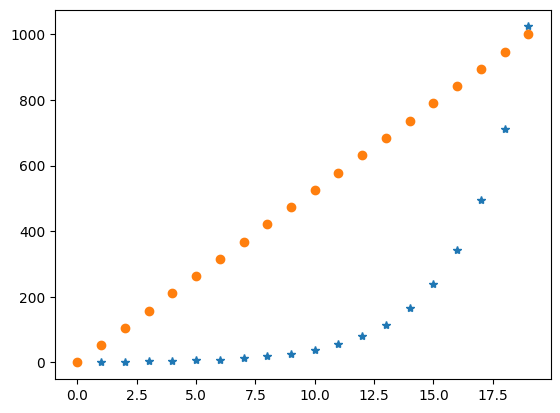

In [25]:
N = 20
X = np.arange(N)
y1 = np.linspace(0, 10, N) * 100
y2 = np.logspace(0, 10, N, base=2)

plt.plot(X, y2, '*')
plt.plot(X, y1, 'o')

In [26]:
# 检查每个元素是否为 True
# base 的 指数为 linspace 得到的就是 logspace
np.alltrue(2 ** np.linspace(0, 10, N)  == y2)

True

> ⚠️ 补充：关于 array 的条件判断

In [27]:
arr = np.array([1, 2, 3])
cond1 = arr > 2
cond1

array([False, False,  True])

In [28]:
if cond1:
    print('这行不行')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [29]:
# 即便你全是 True 它也不行
arr = np.array([1, 2, 3])
cond2 = arr > 0
cond2

array([ True,  True,  True])

In [30]:
if cond2:
    print("这还不行")

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [31]:
# 咱们只能用 any 或 all，这个很容易犯错，请务必注意。
if cond1.any():
    print("只要有一个为True就可以，所以——我可以")

只要有一个为True就可以，所以——我可以


In [32]:
if cond2.all():
    print("所有值为True才可以，我正好这样")

所有值为True才可以，我正好这样
